<a href="https://colab.research.google.com/github/hewanshrestha/ML_Algorithms/blob/master/KMeansClusteringVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K Means Clustering**

In [4]:
# importing the libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import seaborn as sns


In [7]:
# reading the dataset

data = pd.read_csv('driver-data.csv', index_col='id')
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [30]:
# creating a KMeans model

kmeans = KMeans(n_clusters=4)


In [31]:
# training the model with the dataset

kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
#printing the number of cluster centers

kmeans.cluster_centers_

array([[ 4.99820389e+01,  5.21938040e+00,  3.88578059e-15],
       [ 1.80343118e+02,  1.05201149e+01,  1.00000000e+00],
       [ 5.04770991e+01,  3.24599057e+01, -1.55431223e-15],
       [ 1.77835096e+02,  7.02884615e+01,  1.00000000e+00]])

In [33]:
# counting the number of unique values

unique, count = np.unique(kmeans.labels_, return_counts=True)

In [34]:
#zipping unique values and the count into a dictionary

dict_data = dict(zip(unique, count))
dict_data

{0: 2775, 1: 696, 2: 425, 3: 104}

In [35]:
# adding cluster column in the dataframe

data["cluster"] = kmeans.labels_
data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,2
3423313212,52.53,25,2
3423313724,64.54,27,2
3423311373,55.69,22,2
3423310999,54.58,25,2
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


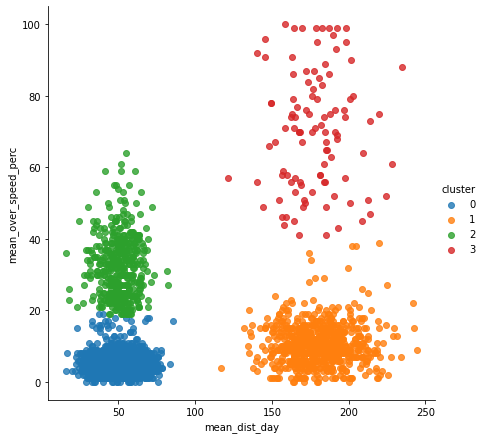

In [41]:
# visualizing the clusters

sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', size=6, aspect=1, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


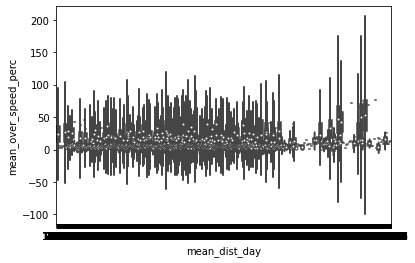

In [43]:
sns.violinplot('mean_dist_day','mean_over_speed_perc', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


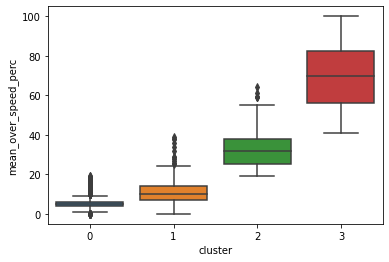

In [46]:
sns.boxplot(data.cluster,data.mean_over_speed_perc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


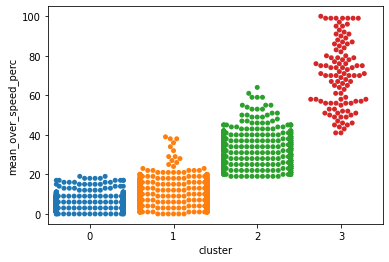

In [49]:
sns.swarmplot(data.cluster,data.mean_over_speed_perc)


In [37]:
# finding the sum of squared distances of samples to their closest cluster center

kmeans.inertia_

719602.1535369135

In [38]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [40]:
# printing the final dataset

data.tail()

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1
3423313630,176.14,5,1
3423311533,168.03,9,1
